In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.datasets import load_iris

In [2]:
data = load_iris()


In [3]:
df = pd.DataFrame(data.data , columns = data.feature_names)
df["target"] = data.target

In [4]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
df["target"].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# detect outliers

<Axes: >

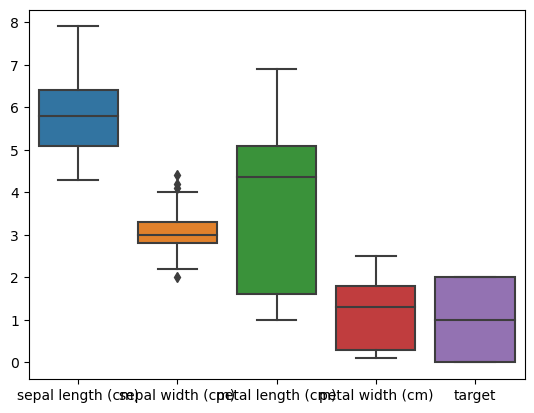

In [8]:
sns.boxplot(df)

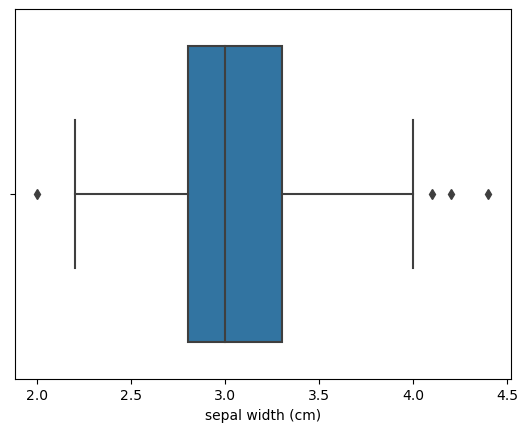

In [9]:
sns.boxplot(x = df["sepal width (cm)"])
plt.show()


In [10]:
df["sepal width (cm)"].skew()

0.31896566471359966

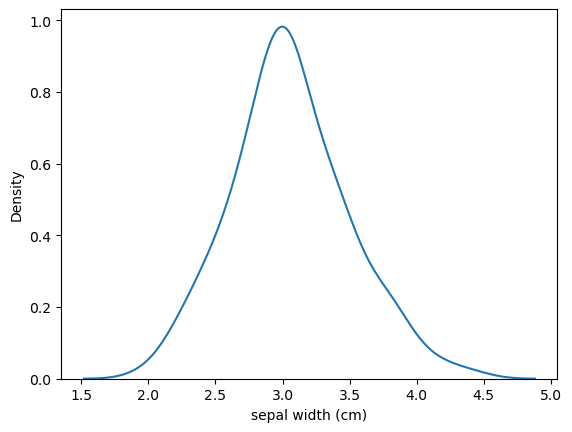

In [11]:
sns.kdeplot(df["sepal width (cm)"])
plt.show()

# Feature engineering

In [12]:
q1 = df["sepal width (cm)"].quantile(0.25)
q3 = df["sepal width (cm)"].quantile(0.75)


iqr = q3-q1
print("iqr >>>",iqr)

upper_tail = q3+1.5*iqr
lower_tail = q1-1.5*iqr


print("upper tail",upper_tail)
print("lower tail",lower_tail)

iqr >>> 0.5
upper tail 4.05
lower tail 2.05


In [13]:
mean = df.loc[(df["sepal width (cm)"] <= upper_tail) & (df["sepal width (cm)"] >= lower_tail),"sepal width (cm)"].mean()
mean

3.0404109589041095

In [14]:
df["sepal width (cm)"] = np.where(df["sepal width (cm)"]>upper_tail,upper_tail,df["sepal width (cm)"])
df["sepal width (cm)"]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64

In [15]:
df["sepal width (cm)"] = np.where(df["sepal width (cm)"]<lower_tail,lower_tail,df["sepal width (cm)"])
df["sepal width (cm)"]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64

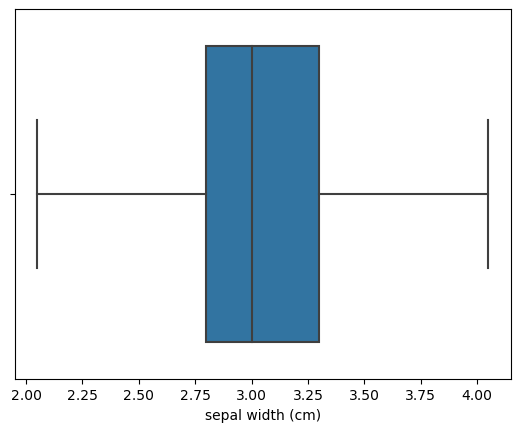

In [16]:
sns.boxplot(x= df["sepal width (cm)"])
plt.show()

In [17]:
df = df.rename(columns={"sepal length (cm)":"sepal_length","sepal width (cm)":"sepal_width",
                        "petal length (cm)":"petal_length","petal width (cm)":"petal_width"})
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [18]:
x = df.iloc[:,1:]
y = df["target"]

In [19]:
x

,sepal_width,petal_length,petal_width,target
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0
2,3.2,1.3,0.2,0
3,3.1,1.5,0.2,0
4,3.6,1.4,0.2,0
...,...,...,...,...
145,3.0,5.2,2.3,2
146,2.5,5.0,1.9,2
147,3.0,5.2,2.0,2
148,3.4,5.4,2.3,2


In [20]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=80)

In [22]:
lr =LogisticRegression()

In [23]:
lr.fit(x_train,y_train)

LogisticRegression()

In [24]:
y_pred_train = lr.predict(x_train)

In [25]:
print("confusion_matrix\n",confusion_matrix(y_train,y_pred_train))
print("accuracy_score\n ",accuracy_score(y_train,y_pred_train))
print("classification report\n ",classification_report(y_train,y_pred_train))

confusion_matrix
 [[37  0  0]
 [ 0 39  0]
 [ 0  0 44]]
accuracy_score
  1.0
classification report
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        44

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [26]:
result = pd.DataFrame({"actual":y_train,"predicted":y_pred_train})
result

,actual,predicted
45,0,0
78,1,1
25,0,0
70,1,1
138,2,2
...,...,...
15,0,0
119,2,2
3,0,0
50,1,1


In [27]:
y_pred_test = lr.predict(x_test)

In [28]:
result = pd.DataFrame({"actual":y_test,"predicted":y_pred_test})
result

,actual,predicted
49,0,0
42,0,0
36,0,0
74,1,1
5,0,0
99,1,1
83,1,1
18,0,0
14,0,0
29,0,0


In [29]:
print("confusion_matrix\n",confusion_matrix(y_test,y_pred_test))
print("accuracy_score\n ",accuracy_score(y_test,y_pred_test))
print("classification report\n ",classification_report(y_test,y_pred_test))


confusion_matrix
 [[13  0  0]
 [ 0 11  0]
 [ 0  0  6]]
accuracy_score
  1.0
classification report
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [30]:
import pickle
import json

In [31]:
columns = list(x.columns)
columns

['sepal_width', 'petal_length', 'petal_width', 'target']

In [34]:
with open("iris_data_new.pkl", "wb")  as f:
    pickle.dump(lr,f)

In [33]:
with open("iris_data.json", "w") as f:
    json.dump(columns,f)

                                   accurate  model